# 1. 语言处理与Python

上百万字的文本，是容易拿到手的。假设我们会写一些简单的程序，那我们可以用它来做些什么？在本章中，我们将解决以下几个问题：

1. 将简单的程序与大量的文本结合起来，我们能实现什么？

2. 我们如何能自动提取概括文本风格和内容的关键词和短语？

3. Python 编程语言为上述工作提供了哪些工具和技术？

4. 自然语言处理中有哪些有趣的挑战？

本章分为完全不同风格的两部分。在“语言计算”部分，我们将选取一些语言相关的编程任务而不去解释它们是如何实现的。在“近观Python”部分，我们将系统地回顾关键的编程概念。两种风格将按章节标题区分，而后面几章将混合两种风格而不作明显的区分。我们希望这种风格的介绍能使你对接下来将要碰到的内容有一个真实的体味，与此同时，涵盖语言学与计算机科学的基本概念。如果你对这两个方面已经有了基本的了解，可以跳到第5 节 ; 我们将在后续的章节中重复所有要点，如果错过了什么，你可以很容易地在 `http://nltk.org/` 上查询在线参考材料。如果这些材料对你而言是全新的，那么本章将引发比解答本身更多的问题，这些问题将在本书的其余部分讨论。

## 1 语言计算：文本和单词

我们都对文本非常熟悉，因为我们每天都读到和写到。在这里，把文本视为我们写的程序的原始数据，这些程序以很多有趣的方式处理和分析文本。但在我们能写这些程序之前，我们必须得从Python 解释器开始。

### 1.1 Python 入门

Python 对用户友好的一个方式是你可以交互式地直接打字给解释器——将要运行你的Python 代码的程序。你可以通过一个简单的叫做交互式开发环境（Interactive DeveLopment Environment，简称IDLE）的图形接口来访问Python 解释器。在Mac 上，你可以在应用程序→MacPython中找到；在Windows 中，你可以在程序→Python中找到。在Unix 下，你可以在shell 输入idle来运行Python（如果没有安装，尝试输入python）。解释器将会输出关于你的Python 的版本简介，请检查你运行的是否是Python 3.8 更高的版本（这里是3.8.16）：

```
Python 3.8.16 | packaged by conda-forge | (default, Feb  1 2023, 15:53:35) [MSC v.1929 64 bit (AMD64)] on win32
Type "help", "copyright", "credits" or "license" for more information.
>>>
```
注

如果你无法运行Python 解释器可能是因为没有正确安装Python。请访问 `http://python.org/` 查阅详细操作说明。NLTK 3.0 在Python 2.6 和2.7 上同样可以工作。如果你使用的是这些较旧的版本，注意/ 运算符会向下舍入小数（所以1/3 会得到0）。为了得到预期的除法行为，你需要输入︰`from __future__ import division`

\>>> 提示符表示Python 解释器正在等待输入。复制这本书的例子时，自己不要键入">>>"。现在，让我们开始把Python 当作计算器使用：

In [1]:
# 一个基本的交互运算
1 + 5 * 2 - 3

8

一旦解释器计算并显示出答案，提示符就会出现。这表示Python 解释器在等待另一个指令。

注意

**轮到你来：** 输入一些你自己的表达式。你可以使用星号（\*）表示乘法，左斜线（/）表示除法，你可以用括号括起表达式。

前面的例子演示了如何交互式的使用Python 解释器，试验Python 语言中各种表达式，看看它们做些什么。现在让我们尝试一个无意义的表达式，看看解释器如何处理：

In [2]:
1 +

SyntaxError: invalid syntax (1278102326.py, line 1)


产生了一个语法错误。在Python 中，指令以加号结尾是没有意义的。Python 解释器会指出发生错误的行（“标准输入”<stdin>的第1 行）。

现在我们学会使用Python 解释器了，已经准备好可以开始处理语言数据了。
    
### 1.2 NLTK 入门
    
在进一步深入之前，应先安装 NLTK 3.0，可以从 `http://nltk.org/` 免费下载。按照说明下载适合你的操作系统的版本。

安装完NLTK 之后，像前面那样启动Python 解释器，在Python 提示符后面输入下面两个命令来安装本书所需的数据，然后选择book集合，如1.1所示。

In [2]:
import nltk # 导入 nltk 库
nltk.download() # 浏览可下载的数据包

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

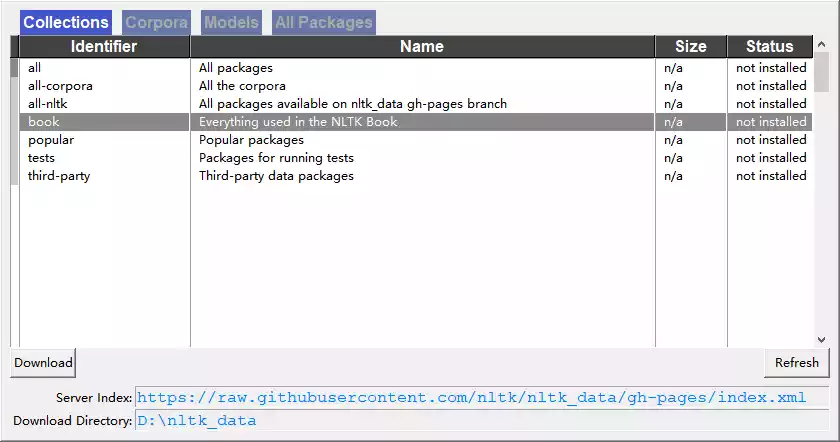

图 1.1：下载NLTK Book 集：使用`nltk.download()` 浏览可用的软件包.下载器上**Collections** 选项卡显示软件包如何被打包分组，选择**book** 标记所在行，可以获取本书的例子和练习所需的全部数据。这些数据包括约30 个压缩文件，需要350MB 硬盘空间。完整的数据集（即下载器中的**all**）在本书写作期间大约是这个大小的10 倍，还在不断扩充。

一旦数据被下载到你的机器，你就可以使用Python 解释器加载其中一些。第一步是在Python 提示符后输入一个特殊的命令，告诉解释器去加载一些我们要用的文本：`from nltk.book import *` 。这条语句是说“从NLTK 的`book` 模块加载所有的东西”。这个`book` 模块包含你阅读本章所需的所有数据。。在输出欢迎信息之后，将会加载几本书的文本（这将需要几秒钟）。下面连同你将看到的输出一起再次列出这条命令。注意拼写和标点符号的正确性，记住不要输入`>>>`。

In [2]:
from nltk.book import * # 加载文本数据

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


任何时候我们想要找到这些文本，只需要在Python 提示符后输入它们的名字：

In [4]:
text1 # 查看文本标题

<Text: Moby Dick by Herman Melville 1851>

In [5]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

现在我们可以和这些数据一起来使用Python 解释器，我们已经准备好上手了。

## 1.3 搜索文本

除了阅读文本之外，还有很多方法可以用来研究文本内容。词语索引视角显示一个指定单词的每一次出现，连同一些上下文一起显示。下面我们输入`text1` 后面跟一个点，再输入函数名`concordance`，然后将`"monstrous"` 放在括号里，来查一下*Moby Dick* 《白鲸记》中的词monstrous：

In [6]:
text1.concordance("monstrous") # 索引指定词的上下文

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


在一段特定的文本上第一次使用concordance 会花费一点时间来构建索引，因此接下来的搜索会很快。

注意

**轮到你来：** 尝试搜索其他词；为了方便重复输入，你也许会用到上箭头，Ctrl-上箭头或者Alt-p 获取之前输入的命令，然后修改要搜索的词。你也可以在我们包含的其他文本上搜索。例如， 使用`text2.concordance("affection")`，搜索*Sense and Sensibility*《理智与情感》中的affection。使用`text3.concordance("lived")` 搜索Genesis《创世纪》找出某人活了多久。你也可以看看`text4`，*Inaugural Address Corpus*《就职演说语料》，回到1789 年看看那时英语的例子，搜索如nation, terror，god 这样的词，看看随着时间推移这些词的使用如何不同。我们也包括了`text5`，*NPS Chat Corpus*《NPS 聊天语料库》：你可以在里面搜索一些网络词，如im ur，lol。（注意这个语料库未经审查！）

在你花了一小会儿研究这些文本之后，我们希望你对语言的丰富性和多样性有一个新的认识。在下一章中，你将学习获取更广泛的文本，包括英语以外其他语言的文本。

词语索引使我们看到词的上下文。例如，我们看到monstrous 出现的上下文， the ___ pictures 和a ___ size。还有哪些词出现在相似的上下文中？我们可以通过在被查询的文本名后添加函数名`similar`，然后在括号中插入相关的词来查找到：

In [7]:
text1.similar("monstrous") # 索引和指定词上下文类似的词

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [8]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


观察我们从不同的文本中得到的不同结果。Austen 使用这些词与Melville 完全不同；在她那里，monstrous是正面的意思，有时它的功能像词very一样作强调成分。

函数`common_contexts`允许我们研究两个或两个以上的词共同的上下文，如monstrous和very。我们必须用方括号和圆括号把这些词括起来，中间用逗号分割：

In [9]:
text2.common_contexts(["monstrous", "very"]) # 研究两个或两个以上的词共同的上下文

am_glad a_pretty a_lucky is_pretty be_glad


注意

**轮到你来：** 挑选另一对词，使用`similar()` 和`common_contexts()` 函数比较它们在两个不同文本中的用法。

自动检测出现在文本中的特定的词，并显示同样上下文中出现的一些词，这只是一个方面。我们也可以判断词在文本中的*位置*：从文本开头算起在它前面有多少词。这个位置信息可以用离散图表示。每一个竖线代表一个单词，每一行代表整个文本。在[1.2](http://www.nltk.org/book/ch01.html#fig-inaugural) 中，我们看到在过去220年中的一些显著的词语用法模式（在一个由就职演说语料首尾相连的人为组合的文本中）。可以用下面的方法画出这幅图。你也许会想尝试更多的词（如，liberty，constitution）和不同的文本。你能在看到这幅图之前预测一个词的分布吗？跟以前一样，请保证引号、逗号、中括号及小括号的使用完全正确。

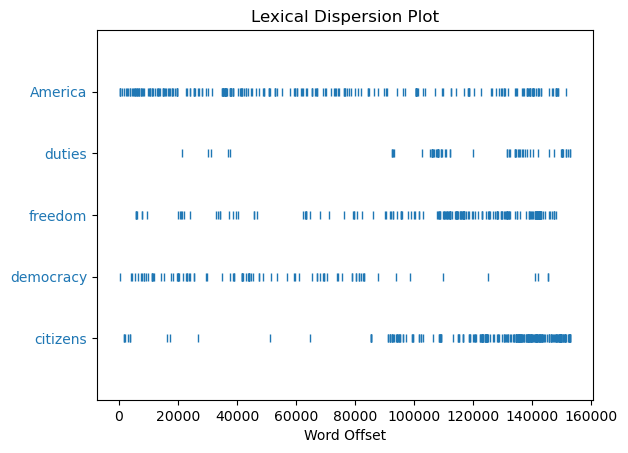

In [3]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"]) # 需要安装 matplotlib 包

图 1.2：美国总统就职演说词汇分布图：可以用来研究随时间推移语言使用上的变化。

注意

**重要事项：** 为了画出这本书中用到的图形，你需要安装Python 的NumPy 和Matplotlib 包。请参阅`http://nltk.org/` 上的安装说明。

注意

你还可以使用`https://books.google.com/ngrams` 画出词汇随着时间的使用频率。

现在轻松一下，让我们尝试产生一些刚才看到的不同风格的随机文本。要做到这一点，我们需要输入文本的名字后面跟函数名`generate`。(需要带括号，但括号里没有也什么。）

In [4]:
text3.generate() # 生成与 text3 文本风格类似的随机文本

Building ngram index...


laid by her , and said unto Cain , Where art thou , and said , Go to ,
I will not do it for ten ' s sons ; we dreamed each man according to
their generatio the firstborn said unto Laban , Because I said , Nay ,
but Sarah shall her name be . , duke Elah , duke Shobal , and Akan .
and looked upon my affliction . Bashemath Ishmael ' s blood , but Isra
for as a prince hast thou found of all the cattle in the valley , and
the wo The


"laid by her , and said unto Cain , Where art thou , and said , Go to ,\nI will not do it for ten ' s sons ; we dreamed each man according to\ntheir generatio the firstborn said unto Laban , Because I said , Nay ,\nbut Sarah shall her name be . , duke Elah , duke Shobal , and Akan .\nand looked upon my affliction . Bashemath Ishmael ' s blood , but Isra\nfor as a prince hast thou found of all the cattle in the valley , and\nthe wo The"

Note

`generate()` 方法在 NLTK 3.0 中不可用，但会在后续版本中恢复。

## 1.4 词汇计数

关于前面例子中出现的文本，最明显的事实是它们所使用的词汇不同。在本节中，我们将看到如何使用计算机以各种有用的方式计数词汇。像以前一样，你将会马上开始用Python 解释器进行试验，即使你可能还没有系统的研究过Python。通过修改这些例子测试一下你是否理解它们，尝试一下本章结尾处的练习。

首先，让我们算出文本从头到尾的长度，包括文本中出现的词和标点符号。我们使用函数`len`获取长度，请看在《创世纪》中使用的例子：

In [5]:
len(text3) # 文本长度（词和标点符号）

44764

《创世纪》有44764 个词和标点符号或者叫“词符”。词符 表示一个我们想要整体对待的字符序列 —— 例如`hairy`，`his` 或 `:)`。当我们计数文本如to be or not to be 这个短语中词符的个数时，我们计数这些序列出现的次数。因此，我们的例句中出现了to 和be 各两次，or 和not 各一次。然而在例句中只有4 个不同的词。《创世纪》中有多少不同的词？要用Python 来回答这个问题，我们处理问题的方法将稍有改变。一个文本词汇表只是它用到的词符的*集合*，因为在集合中所有重复的元素都只算一个。Python 中我们可以使用命令：`set(text3)` 获得`text3` 的词汇表。当你这样做时，屏幕上的很多词会掠过。现在尝试以下操作：

In [7]:
sorted(set(text3)) # [1]（注释为编号的对应在文字说明部分为代码解释） 获取 text3 文本词汇表并排序

['!',
 "'",
 '(',
 ')',
 ',',
 ',)',
 '.',
 '.)',
 ':',
 ';',
 ';)',
 '?',
 '?)',
 'A',
 'Abel',
 'Abelmizraim',
 'Abidah',
 'Abide',
 'Abimael',
 'Abimelech',
 'Abr',
 'Abrah',
 'Abraham',
 'Abram',
 'Accad',
 'Achbor',
 'Adah',
 'Adam',
 'Adbeel',
 'Admah',
 'Adullamite',
 'After',
 'Aholibamah',
 'Ahuzzath',
 'Ajah',
 'Akan',
 'All',
 'Allonbachuth',
 'Almighty',
 'Almodad',
 'Also',
 'Alvah',
 'Alvan',
 'Am',
 'Amal',
 'Amalek',
 'Amalekites',
 'Ammon',
 'Amorite',
 'Amorites',
 'Amraphel',
 'An',
 'Anah',
 'Anamim',
 'And',
 'Aner',
 'Angel',
 'Appoint',
 'Aram',
 'Aran',
 'Ararat',
 'Arbah',
 'Ard',
 'Are',
 'Areli',
 'Arioch',
 'Arise',
 'Arkite',
 'Arodi',
 'Arphaxad',
 'Art',
 'Arvadite',
 'As',
 'Asenath',
 'Ashbel',
 'Asher',
 'Ashkenaz',
 'Ashteroth',
 'Ask',
 'Asshur',
 'Asshurim',
 'Assyr',
 'Assyria',
 'At',
 'Atad',
 'Avith',
 'Baalhanan',
 'Babel',
 'Bashemath',
 'Be',
 'Because',
 'Becher',
 'Bedad',
 'Beeri',
 'Beerlahairoi',
 'Beersheba',
 'Behold',
 'Bela',
 'Belah

In [8]:
len(set(text3)) # [2]

2789

用`sorted()` 包裹起Python 表达式`set(text3)`  [# 1](http://www.nltk.org/book/ch01.html#sorted-set)，我们得到一个词汇项的排序表，这个表以各种标点符号开始，然后是以A 开头的词汇。大写单词排在小写单词前面。我们通过求集合中元素的个数间接获得词汇表的大小，再次使用`len`来获得这个数值 [# 2](http://www.nltk.org/book/ch01.html#len-set)。尽管小说中有44,764 个词符，但只有2,789 个不同的单词或“词类型”。一个词类型是指一个词在一个文本中独一无二的出现形式或拼写 —— 也就是说，这个词在词汇表中是唯一的。我们计数的2,789 个元素中包括标点符号，所以我们把这些叫做唯一元素类型而不是词类型。

现在，让我们对文本词汇丰富度进行测量。下一个例子向我们展示，不同的单词数目只是单词总数的6%，或者每个单词平均被使用了16 次（记住，如果你使用的是Python 2，请在开始输入`from __future__ import division`）。

In [9]:
len(set(text3)) / len(text3) # 文本词汇丰富度  不重复词汇数量/使用词汇总数

0.06230453042623537

接下来，让我们专注于特定的词。我们可以计数一个词在文本中出现的次数，计算一个特定的词在文本中占据的百分比：

In [10]:
text3.count("smote") # 统计一个词在文本中出现的次数

5

In [11]:
100 * text4.count('a') / len(text4) # 计算一个特定的词在文本中占据的百分比

1.457806031353621

注

**轮到你来：** `text5` 中lol 出现了多少次？它占文本全部词数的百分比是多少？

你也许想要对几个文本重复这些计算，但重新输入公式是乏味的。你可以自己命名一个任务，如“lexical_diversity”或“percentage”，然后用一个代码块关联它。现在，你只需输入一个很短的名字就可以代替一行或多行Python 代码，而且你想用多少次就用多少次。执行一个任务的代码段叫做一个函数，我们使用关键字`def` 给函数定义一个简短的名字。下面的例子演示如何定义两个新的函数，`lexical_diversity()` 和`percentage()`：

In [12]:
def lexical_diversity(text): # 1
    return len(set(text)) / len(text) # 2 统计文本不重复词汇数量

def percentage(count, total): # 3
    return 100 * count / total # 单个词使用次数在全文词数的百分比

小心！

当遇到第一行末尾的冒号后，Python 解释器提示符由`>>>` 变为`...` 。`...`提示符表示Python 期望在后面是一个缩进代码块 。缩进是输入四个空格还是敲击Tab 键，这由你决定。要结束一个缩进代码段，只需输入一个空行。

`lexical_diversity()` [# 1](http://www.nltk.org/book/ch01.html#fun-parameter1) 的定义中，我们指定了一个`text` 参数。这个参数是我们想要计算词汇多样性的实际文本的一个“占位符”，并在用到这个函数的时候出现在将要运行的代码块中 [# 2](http://www.nltk.org/book/ch01.html#locvar) 。类似地，`percentage()` 定义了两个参数，`count` 和`total` [# 3](http://www.nltk.org/book/ch01.html#fun-parameter2) 。

只要Python 知道了`lexical_diversity()` 和`percentage()` 是指定代码段的名字，我们就可以继续使用这些函数：

In [13]:
lexical_diversity(text3) # text3 文本中不重复词全文占比

0.06230453042623537

In [14]:
lexical_diversity(text5) # text5 文本中不重复词全文占比

0.13477005109975562

In [15]:
percentage(4, 5)

80.0

In [16]:
percentage(text4.count('a'), len(text4))  # text4 文本中单词 a 占全文总词数的比值

1.457806031353621

扼要重述一下，我们使用或调用一个如`lexical_diversity()` 这样的函数，只要输入它的名字后面跟一个左括号，再输入文本名字，然后是右括号。这些括号经常出现，它们的作用是分割任务名—— 如`lexical_diversity()`，与任务将要处理的数据 ——如`text3`。调用函数时放在参数位置的数据值叫做函数的实参。

在本章中你已经遇到了几个函数，如`len()`, `set()` 和`sorted()`。通常我们会在函数名后面加一对空括号，像`len()`中的那样，这只是为了表明这是一个函数而不是其他的Python 表达式。函数是编程中的一个重要概念，我们在一开始提到它们，是为了让新同学体会编程的强大和富有创造力。如果你现在觉得有点混乱，请不要担心。

稍后我们将看到如何使用函数列表显示数据，像表[1.1](http://www.nltk.org/book/ch01.html#tab-brown-types)显示的那样。表的每一行将包含不同数据的相同的计算，我们用函数来做这种重复性的工作。

表 1.1：

*Brown 语料库*中各种文体的词汇多样性



In [17]:
sent1 = ['Call', 'me', 'Ishmael', '.'] # 定义列表并赋值

在提示符后面，我们输入自己命名的`sent1`，后跟一个等号，然后是一些引用的词汇，中间用逗号分割并用括号包围。这个方括号内的东西在Python 中叫做列表：它就是我们存储文本的方式。我们可以通过输入它的名字来查阅它 [# 1](http://www.nltk.org/book/ch01.html#inspect-var)。我们可以查询它的长度 [# 2](http://www.nltk.org/book/ch01.html#len-sent)。我们甚至可以对它调用我们自己的函数`lexical_diversity()`[# 3](http://www.nltk.org/book/ch01.html#apply-function)。

In [18]:
sent1 # 1

['Call', 'me', 'Ishmael', '.']

In [19]:
len(sent1) # 2

4

In [20]:
lexical_diversity(sent1) # 3 sent1 列表中不重复词全文占比

1.0

还定义了其它几个列表，分别对应每个文本开始的句子，`sent2` … `sent9`。在这里我们检查其中的两个；你可以自己在Python 解释器中尝试其余的（如果你得到一个错误说`sent2` 没有定义，你需要先输入`from nltk.book import *`）。

In [21]:
sent2 # 定义了几个列表，对应每个文本开始的句子

['The',
 'family',
 'of',
 'Dashwood',
 'had',
 'long',
 'been',
 'settled',
 'in',
 'Sussex',
 '.']

In [22]:
sent3

['In',
 'the',
 'beginning',
 'God',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth',
 '.']

注意

**轮到你来：** 通过输入名字、等号和一个单词列表, 组建几个你自己的句子，如`ex1 = ['Monty', 'Python', 'and', 'the', 'Holy', 'Grail']`。重复一些我们先前在第[1](http://www.nltk.org/book/ch01.html#sec-computing-with-language-texts-and-words) 节看到的其他Python 操作，如：`sorted(ex1)`, `len(set(ex1))`, `ex1.count('the')`。

令人惊喜的是，我们可以对列表使用Python 加法运算。两个列表相加 [# 1](http://www.nltk.org/book/ch01.html#list-plus-list)创造出一个新的列表，包括第一个列表的全部，后面跟着第二个列表的全部。

In [23]:
['Monty', 'Python'] + ['and', 'the', 'Holy', 'Grail'] 

['Monty', 'Python', 'and', 'the', 'Holy', 'Grail']

注意

这种加法的特殊用法叫做连接；它将多个列表组合为一个列表。我们可以把句子连接起来组成一个文本。

不必逐字的输入列表，可以使用简短的名字来引用预先定义好的列表。

In [24]:
sent4 + sent1

['Fellow',
 '-',
 'Citizens',
 'of',
 'the',
 'Senate',
 'and',
 'of',
 'the',
 'House',
 'of',
 'Representatives',
 ':',
 'Call',
 'me',
 'Ishmael',
 '.']

如果我们想要向链表中增加一个元素该如何？这种操作叫做追加。当我们对一个列表使用`append()`时，列表自身会随着操作而更新。

In [26]:
sent1.append("Some") # 向 sent1 列表追加元素
sent1

['Call', 'me', 'Ishmael', '.', 'Some']

## 2.2 索引列表

正如我们已经看到的，Python 中的一个文本是一个单词的列表，用括号和引号的组合来表示。就像处理一页普通的文本，我们可以使用`len(text1)` 计算`text1`的词数，使用`text1.count('heaven')`计算一个文本中出现的特定的词，如`'heaven'`。

稍微花些耐心，我们可以挑选出打印出来的文本中的第1 个、第173 个或第14278个词。类似的，我们也可以通过它在列表中出现的次序找出一个Python 列表的元素。表示这个位置的数字叫做这个元素的索引。在文本名称后面的方括号里写下索引，Python 就会表示出文本中这个索引处如`173`的元素：

In [27]:
text4[173] # text4 文本索引为173的元素

'awaken'

我们也可以反过来做；找出一个词第一次出现的索引：

In [28]:
text4.index('awaken') # 所指定词第一次出现的索引位置

173

索引是一种常见的用来获取文本中词汇的方式，或者更一般的，访问列表中的元素的方式。Python 也允许我们获取子列表，从大文本中任意抽取语言片段，术语叫做切片。

In [29]:
text5[16715:16735] # 列表切片

['U86',
 'thats',
 'why',
 'something',
 'like',
 'gamefly',
 'is',
 'so',
 'good',
 'because',
 'you',
 'can',
 'actually',
 'play',
 'a',
 'full',
 'game',
 'without',
 'buying',
 'it']

In [30]:
text6[1600:1625]

['We',
 "'",
 're',
 'an',
 'anarcho',
 '-',
 'syndicalist',
 'commune',
 '.',
 'We',
 'take',
 'it',
 'in',
 'turns',
 'to',
 'act',
 'as',
 'a',
 'sort',
 'of',
 'executive',
 'officer',
 'for',
 'the',
 'week']

索引有一些微妙，我们将在一个构造的句子的帮助下探讨这些：

In [40]:
sent = ['word1', 'word2', 'word3', 'word4', 'word5', \
         'word6', 'word7', 'word8', 'word9', 'word10']
sent[0]

'word1'

In [33]:
sent[9]

'word10'

请注意，索引从零开始：`sent` 第0 个元素写作`sent[0]`，是第一个单词`'word1'`，而`sent` 的第9 个元素是`'word10'`。原因很简单：Python 从计算机内存中的列表获取内容的时候，它已经位于第一个元素；我们要告诉它向前多少个元素。因此，向前0 个元素使它留在第一个元素上。

注意

这种从零算起的做法刚开始接触会有些混乱，但这是现代编程语言普遍使用的。如果你已经掌握了19XY 是20 世纪中的一年这样的计数世纪的系统，或者如果你生活在一个建筑物楼层编号从1 开始的国家，你很开就会掌握它的窍门，步行n-1级楼梯到第n 层。

现在，如果我们不小心使用的索引过大就会得到一个错误：

In [41]:
sent[10]

IndexError: list index out of range

这次不是一个语法错误，因为程序片段在语法上是正确的。相反，它是一个运行时错误，它会产生一个`回溯`消息显示错误的上下文、错误的名称：`IndexError` 以及简要的解释说明。

让我们再次使用构造的句子仔细看看切片。这里我们发现切片`5:8` 包含`sent` 中索引为5，6 和7的元素：

In [42]:
sent[5:8]

['word6', 'word7', 'word8']

In [43]:
sent[5]

'word6'

In [44]:
sent[6]

'word7'

In [45]:
sent[7]

'word8'

按照惯例，`m:n` 表示元素m…n-1。正如下一个例子显示的那样，如果切片从列表第一个元素开始，我们可以省略第一个数字 [# 1](http://www.nltk.org/book/ch01.html#slice2), 如果切片到列表最后一个元素处结尾，我们可以省略第二个数字 [# 2](http://www.nltk.org/book/ch01.html#slice3)：

In [47]:
sent[:3] # 1

['word1', 'word2', 'word3']

In [48]:
text2[141525:] # 2 

['among',
 'the',
 'merits',
 'and',
 'the',
 'happiness',
 'of',
 'Elinor',
 'and',
 'Marianne',
 ',',
 'let',
 'it',
 'not',
 'be',
 'ranked',
 'as',
 'the',
 'least',
 'considerable',
 ',',
 'that',
 'though',
 'sisters',
 ',',
 'and',
 'living',
 'almost',
 'within',
 'sight',
 'of',
 'each',
 'other',
 ',',
 'they',
 'could',
 'live',
 'without',
 'disagreement',
 'between',
 'themselves',
 ',',
 'or',
 'producing',
 'coolness',
 'between',
 'their',
 'husbands',
 '.',
 'THE',
 'END']

我们可以通过赋值给它的索引值来修改列表中的元素。在接下来的例子中，我们把`sent[0]` 放在等号左侧 [# 
1](http://www.nltk.org/book/ch01.html#list-assignment)。我们也可以用新内容替换掉一整个片段 [# 2](http://www.nltk.org/book/ch01.html#slice-assignment)。最后一个尝试报错的原因是这个链表只有四个元素而要获取其后面的元素就产生了错误 [# 3](http://www.nltk.org/book/ch01.html#list-error)。

In [50]:
sent[0] = 'First' # 1
sent[9] = 'Last'
len(sent)

10

In [51]:
sent[1:9] = ['Second', 'Third'] # 2
sent

['First', 'Second', 'Third', 'Last']

In [52]:
sent[9] # 3

IndexError: list index out of range

注意

**轮到你来：**花几分钟定义你自己的句子，使用前文中的方法修改个别词和词组（切片）。尝试本章结尾关于列表的练习，检验你是否理解。

## 2.3 变量

从第[1](http://www.nltk.org/book/ch01.html#sec-computing-with-language-texts-and-words)节一开始，你已经访问过名为`text1`, `text2` 等的文本。像这样只输入简短的名字来引用一本250,000 字的书节省了很多打字时间。一般情况下，我们可以对任何我们关心的计算命名。我们在前面的小节中已经这样做了，例如定义一个变量变量 `sent1`，如下所示：

In [53]:
sent1 = ['Call', 'me', 'Ishmael', '.']

这样的语句形式是：*变量 = 表达式*。Python 将计算右边的表达式把结果保存在变量中。这个过程叫做赋值。它并不产生任何输出，你必须在新的一行输入变量的名字来检查它的内容。等号可能会有些误解，因为信息是从右边流到左边的。你把它想象成一个左箭头可能会有帮助。变量的名字可以是任何你喜欢的名字，如`my_sent`, `sentence`, `xyzzy`。变量必须以字母开头，可以包含数字和下划线。下面是变量和赋值的一些例子：

In [54]:
my_sent = ['Bravely', 'bold', 'Sir', 'Robin', ',', 'rode', \
    'forth', 'from', 'Camelot', '.']
noun_phrase = my_sent[1:4]
noun_phrase

['bold', 'Sir', 'Robin']

In [55]:
wOrDs = sorted(noun_phrase)
wOrDs

['Robin', 'Sir', 'bold']

请记住，排序表中大写字母出现在小写字母之前。

注意

请注意，在前面的例子中，我们将`my_sent` 的定义分成两行。Python 表达式可以被分割成多行，只要它出现在任何一种括号内。Python 使用"`...`"提示符表示期望更多的输入。在这些连续的行中有多少缩进都没有关系，只是加入缩进通常会便于阅读。

最好是选择有意义的变量名，它能提醒你代码的含义，也帮助别人读懂你的Python 代码。Python 并不会理解这些名称的意义;它只是盲目的服从你的指令，如果你输入一些令人困惑的代码，例如`one = 'two'` 或`two = 3`,它也不会反对。唯一的限制是变量名不能是Python 的保留字，如`def`, `if`, `not`, 和`import`。如果你使用了保留字，Python 会产生一个语法错误：

In [56]:
not = 'Camelot'

SyntaxError: invalid syntax (3303447762.py, line 1)

我们将经常使用变量来保存计算的中间步骤，尤其是当这样做使代码更容易读懂时。因此，`len(set(text1))` 也可以写作：

In [57]:
vocab = set(text1)
vocab_size = len(vocab)
vocab_size

19317

小心！

为Python 变量选择名称（标识符）时请注意。首先，应该以字母开始，后面跟数字（`0` 到`9`）或字母。因此，`abc23` 是好的，但是`23abc` 会导致一个语法错误。名称是大小写敏感的，这意味着`myVar` 和`myvar` 是不同的变量。变量名不能包含空格，但可以用下划线把单词分开，例如`my_var`。注意不要插入连字符来代替下划线：`my-var` 不对，因为Python 会把"`-`"解释为减号。

## 2.4 字符串

我们用来访问列表元素的一些方法也可以用在单独的词或字符串上。例如可以把一个字符串指定给一个变量 [# 1](http://www.nltk.org/book/ch01.html#assign-string)，索引一个字符串 [# 2](http://www.nltk.org/book/ch01.html#index-string)，切片一个字符串 [# 3](http://www.nltk.org/book/ch01.html#slice-string)：

In [58]:
name = 'Monty' # 1
name[0] # 2

'M'

In [59]:
name[:4] # 3

'Mont'

我们还可以对字符串执行乘法和加法：

In [60]:
name * 2

'MontyMonty'

In [61]:
name + '!'

'Monty!'

我们可以把列表中的单词连接起来组成单个字符串，或者把字符串分割成一个列表，如下面所示：

In [62]:
' '.join(['Monty', 'Python'])

'Monty Python'

In [63]:
'Monty Python'.split()

['Monty', 'Python']

我们将在第[3](http://www.nltk.org/book/ch03.html#chap-words)章回到字符串的主题。目前，我们已经有了两个重要的基石——列表和字符串——已经准备好可以重新做一些语言分析了。

## 3 计算语言：简单的统计

让我们重新开始探索用我们的计算资源处理大量文本的方法。我们在第[1](http://www.nltk.org/book/ch01.html#sec-computing-with-language-texts-and-words)节已经开始讨论了，在那里我们看到如何搜索词及其上下文，如何汇编一个文本中的词汇，如何产生一种文体的随机文本等。

在本节中，我们重新拾起是什么让一个文本不同与其他文本这样的问题，并使用程序自动寻找特征词汇和文字表达。正如在第[1](http://www.nltk.org/book/ch01.html#sec-computing-with-language-texts-and-words)节中那样，你可以通过复制它们到Python 解释器中来尝试Python 语言的新特征，你将在下一节中系统的了解这些功能。

在这之前，你可能会想通过预测下面的代码的输出来检查你对上一节的理解。你可以使用解释器来检查你是否正确。如果你不确定如何做这个任务，你最好在继续之前复习一下上一节的内容。

In [64]:
saying = ['After', 'all', 'is', 'said', 'and', 'done', \
              'more', 'is', 'said', 'than', 'done']
tokens = set(saying)
tokens = sorted(tokens)
tokens[-2:] # what output do you expect here?

['said', 'than']

## 3.1 频率分布

我们如何能自动识别文本中最能体现文本的主题和风格的词汇？试想一下，要找到一本书中使用最频繁的50 个词你会怎么做？一种方法是为每个词项设置一个计数器，如图[3.1](http://www.nltk.org/book/ch01.html#fig-tally)显示的那样。计数器可能需要几千行，这将是一个极其繁琐的过程——如此繁琐以至于我们宁愿把任务交给机器来做。

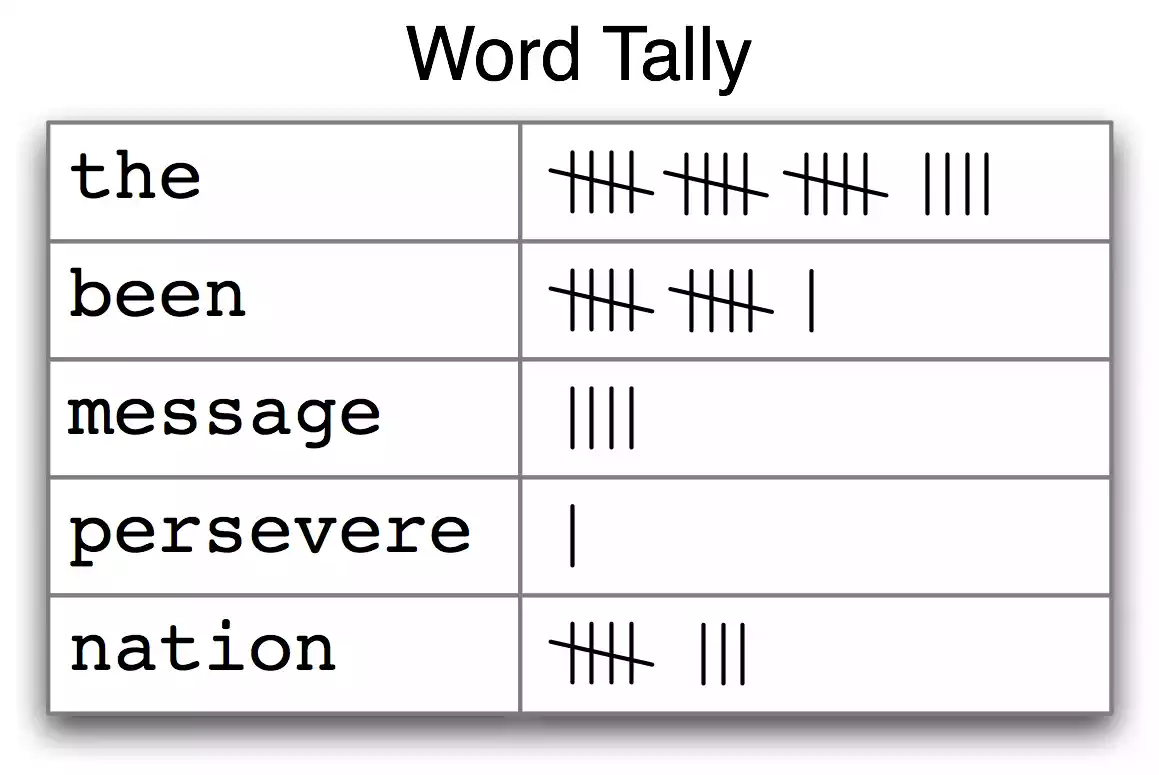

图 3.1：计数一个文本中出现的词（频率分布）

图[3.1](http://www.nltk.org/book/ch01.html#fig-tally) 中的表被称为频率分布，它告诉我们在文本中的每一个词项的频率。（一般情况下，它能计数任何观察得到的事件。）这是一个“分布”因为它告诉我们文本中单词词符的总数是如何分布在词项中的。因为我们经常需要在语言处理中使用频率分布，NLTK 中内置了它们。让我们使用`FreqDist` 寻找*《白鲸记》*中最常见的50 个词：

In [65]:
fdist1 = FreqDist(text1) # 1  # text1 文本中每一个词的频率分布，即出现次数
print(fdist1) # 2

<FreqDist with 19317 samples and 260819 outcomes>


In [66]:
fdist1.most_common(50) # 3 该文本中最常见的 50 个词

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632),
 ('as', 1620),
 ('"', 1478),
 ('all', 1462),
 ('for', 1414),
 ('this', 1280),
 ('!', 1269),
 ('at', 1231),
 ('by', 1137),
 ('but', 1113),
 ('not', 1103),
 ('--', 1070),
 ('him', 1058),
 ('from', 1052),
 ('be', 1030),
 ('on', 1005),
 ('so', 918),
 ('whale', 906),
 ('one', 889),
 ('you', 841),
 ('had', 767),
 ('have', 760),
 ('there', 715),
 ('But', 705),
 ('or', 697),
 ('were', 680),
 ('now', 646),
 ('which', 640),
 ('?', 637),
 ('me', 627),
 ('like', 624)]

In [67]:
fdist1['whale'] # 指定词出现频次

906

第一次调用`FreqDist`时，传递文本的名称作为参数 [# 1](http://www.nltk.org/book/ch01.html#freq-dist-call)。我们可以看到已经被计算出来的 *《白鲸记》* 中的总的词数（“outcomes”）—— 260,819 [# 2](http://www.nltk.org/book/ch01.html#freq-dist-inspect)。表达式`most_common(50)` 给出文本中50 个出现频率最高的单词类型 [# 3](http://www.nltk.org/book/ch01.html#freq-dist-most-common)。

注意

**轮到你来：**使用`text2`尝试前面的频率分布的例子。注意正确使用括号和大写字母。如果你得到一个错误消息`NameError: name 'FreqDist' is not defined`，你需要在一开始输入`from nltk.book import *`

上一个例子中是否有什么词有助于我们把握这个文本的主题或风格呢？只有一个词，whale，稍微有些信息量！它出现了超过900 次。其余的词没有告诉我们关于文本的信息；它们只是“管道”英语。这些词在文本中占多少比例？我们可以产生一个这些词汇的累积频率图，使用`fdist1.plot(50, cumulative=True)` 来生成[3.2](http://www.nltk.org/book/ch01.html#fig-fdist-moby) 中的图。这50 个词占了书的将近一半！

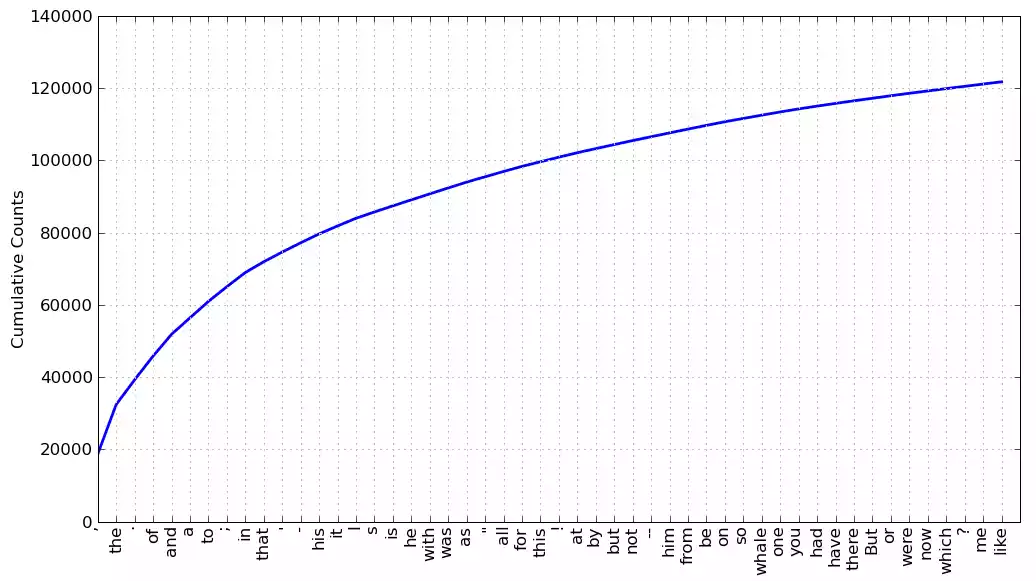

图 3.2: *《白鲸记》*中50 个最常用词的累积频率图：这些词占了所有词符的将近一半。

如果高频词对我们没有帮助，那些只出现了一次的词（所谓的hapaxes）又如何呢？输入`fdist1.hapaxes()` 来查看它们。这个列表包含lexicographer, cetological, contraband, expostulations 以及其他9,000 多个。看来低频词太多了，没看到上下文我们很可能有一半的hapaxes 猜不出它们的意义！既然高频词和低频词都没有帮助，我们需要尝试其他的办法。

## 3.2 细粒度的选择词

接下来，让我们看看文本中的*长*词，也许它们有更多的特征和信息量。为此我们采用集合论的一些符号。我们想要找出文本词汇表长度中超过15 个字符的词。我们定义这个性质为P，则P(w) 为真当且仅当词w 的长度大余15 个字符。现在我们可以用[(1a)](http://www.nltk.org/book/ch01.html#ex-set-comprehension-math) 中的数学集合符号表示我们感兴趣的词汇。它的含义是：此集合中所有w 都满足w 是集合V V（词汇表）的一个元素且w有性质P。

In [68]:
V = set(text1) # 获取文本中所有不重复词
long_words = [w for w in V if len(w) > 15] # 获取不重复词列表中字符超过15的词
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

对于词汇表`V` 中的每一个词`w`，我们检查`len(w)` 是否大于15；所有其他词汇将被忽略。我们将在后面更仔细的讨论这里的语法。

注意

**轮到你来：** 在Python 解释器中尝试上面的表达式，改变文本和长度条件做一些实验。如果改变变量名，你的结果会产生什么变化吗，如使用`[word for word in vocab if ...]`？

让我们回到寻找文本特征词汇的任务上来。请注意，`text4` 中的长词反映国家主题 — constitutionally, transcontinental — 而`text5` 中的长词反映的不是真正的内容boooooooooooglyyyyyy 和 yuuuuuuuuuuuummmmmmmmmmmm。我们是否已经成功的自动提取出文本的特征词汇呢？好的，这些很长的词通常是hapaxes（即唯一的），也许找出*频繁出现的*长词会更好。这样看起来更有前途，因为这样忽略了短高频词（如the）和长低频词（如antiphilosophists）。以下是聊天语料库中所有长度超过7 个字符，且出现次数超过7 次的词：

In [70]:
fdist5 = FreqDist(text5) # text5 文本中所有词的频率分布
sorted(w for w in set(text5) if len(w) > 7 and fdist5[w] > 7) # 长度大于7的词

['#14-19teens',
 '#talkcity_adults',
 '((((((((((',
 '........',
 'Question',
 'actually',
 'anything',
 'computer',
 'cute.-ass',
 'everyone',
 'football',
 'innocent',
 'listening',
 'remember',
 'seriously',
 'something',
 'together',
 'tomorrow',
 'watching']

注意我们是如何使用两个条件：`len(w) > 7` 保证词长都超过七个字母，`fdist5[w] > 7` 保证这些词出现超过7 次。最后，我们已成功地自动识别出与文本内容相关的高频词。这很小的一步却是一个重要的里程碑：一小块代码，处理数以万计的词，产生一些有信息量的输出。

## 3.3 词语搭配和双连词

一个搭配是异乎寻常地经常在一起出现的词序列。red wine 是一个搭配，而the wine 不是。搭配的一个特点是其中的词不能被类似的词置换。例如：maroon wine（粟色酒）听起来就很奇怪。

要获取搭配，我们先从提取文本词汇中的词对，也就是双连词开始。使用函数`bigrams()`很容易实现：

In [71]:
list(bigrams(['more', 'is', 'said', 'than', 'done'])) # 从指定单词列表组成并返回双连词列表

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

注意

如果上面省掉`list()`，只输入`bigrams(['more', ...])`，你将看到`<generator object bigrams at 0x10fb8b3a8>` 的输出形式。这是 Python 的方式表示它已经准备好要计算一个序列，在这里是双连词。现在，你只需要知道告诉Python 使用`list()`将它转换成一个列表。

在这里我们看到词对than-done是一个双连词，在Python 中写成`('than', 'done')`。现在，搭配基本上就是频繁的双连词，除非我们更加注重包含不常见词的的情况。特别的，我们希望找到比我们基于单个词的频率预期得到的更频繁出现的双连词。`collocations()` 函数为我们做这些。我们将在以后看到它是如何工作。

In [72]:
text4.collocations() # 更频繁的双连词

United States; fellow citizens; years ago; four years; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; one another; fellow Americans; Old World;
Almighty God; Fellow citizens; Chief Magistrate; every citizen; Indian
tribes; public debt; foreign nations


In [73]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


文本中出现的搭配很能体现文本的风格。为了找到red wine这个搭配，我们将需要处理更大的文本。

## 3.4 计数其他东西

计数词汇是有用的，我们也可以计数其他东西。例如，我们可以查看文本中词长的分布，通过创造一长串数字的列表的`FreqDist`，其中每个数字是文本中对应词的长度：

In [74]:
[len(w) for w in text1] # 1 根据每个单词长度获取全网词长分别

[1,
 4,
 4,
 2,
 6,
 8,
 4,
 1,
 9,
 1,
 1,
 8,
 2,
 1,
 4,
 11,
 5,
 2,
 1,
 7,
 6,
 1,
 3,
 4,
 5,
 2,
 10,
 2,
 4,
 1,
 5,
 1,
 4,
 1,
 3,
 5,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 7,
 3,
 3,
 8,
 3,
 8,
 1,
 4,
 1,
 5,
 12,
 1,
 9,
 11,
 4,
 3,
 3,
 3,
 5,
 2,
 3,
 3,
 5,
 7,
 2,
 3,
 5,
 1,
 2,
 5,
 2,
 4,
 3,
 3,
 8,
 1,
 2,
 7,
 6,
 8,
 3,
 2,
 3,
 9,
 1,
 1,
 5,
 3,
 4,
 2,
 4,
 2,
 6,
 6,
 1,
 3,
 2,
 5,
 4,
 2,
 4,
 4,
 1,
 5,
 1,
 4,
 2,
 2,
 2,
 6,
 2,
 3,
 6,
 7,
 3,
 1,
 7,
 9,
 1,
 3,
 6,
 1,
 1,
 5,
 6,
 5,
 6,
 3,
 13,
 2,
 3,
 4,
 1,
 3,
 7,
 4,
 5,
 2,
 3,
 4,
 2,
 2,
 8,
 1,
 5,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 4,
 6,
 2,
 5,
 4,
 9,
 2,
 7,
 1,
 3,
 2,
 3,
 1,
 5,
 2,
 6,
 2,
 7,
 2,
 2,
 7,
 1,
 1,
 10,
 1,
 5,
 1,
 3,
 2,
 2,
 4,
 11,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 2,
 6,
 2,
 2,
 10,
 1,
 1,
 10,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 6,
 1,
 3,
 1,
 5,
 1,
 4,
 1,
 7,
 1,
 5,
 1,
 9,

In [75]:
fdist = FreqDist(len(w) for w in text1)  # 2 统计文本中最多的长度相同的单词
print(fdist)  # 3

<FreqDist with 19 samples and 260819 outcomes>


In [77]:
fdist # 3 个字母的词最多、1 个字母的词第二多……

FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

我们以导出`text1` 中每个词的长度的列表开始 [# 1](http://www.nltk.org/book/ch01.html#word-lengths)，然后`FreqDist` 计数列表中每个数字出现的次数 [# 2](http://www.nltk.org/book/ch01.html#freq-word-lengths)。结果 [# 3](http://www.nltk.org/book/ch01.html#freq-word-lengths-size) 是一个包含25 万左右个元素的分布，每一个元素是一个数字，对应文本中一个词标识符。但是只有20 个不同的元素，从1 到20，因为只有20 个不同的词长。也就是说，有由1 个字符，2 个字符，...，20 个字符组成的词，而没有由21 个或更多字符组成的词。有人可能会问不同长度的词的频率是多少？（例如，文本中有多少长度为4 的词？长度为5 的词是否比长度为4 的词多？等等）。下面我们回答这个问题：

In [78]:
fdist.most_common() # 最常见长度的单词是三字母单词

[(3, 50223),
 (1, 47933),
 (4, 42345),
 (2, 38513),
 (5, 26597),
 (6, 17111),
 (7, 14399),
 (8, 9966),
 (9, 6428),
 (10, 3528),
 (11, 1873),
 (12, 1053),
 (13, 567),
 (14, 177),
 (15, 70),
 (16, 22),
 (17, 12),
 (18, 1),
 (20, 1)]

In [79]:
fdist.max()

3

In [80]:
fdist[3]

50223

In [81]:
fdist.freq(3)

0.19255882431878046

由此我们看到，最频繁的词长度是3，长度为3 的词有50,000 多个（约占书中全部词汇的20％）。虽然我们不会在这里追究它，关于词长的进一步分析可能帮助我们了解作者、文体或语言之间的差异。

[3.1](http://www.nltk.org/book/ch01.html#tab-freqdist) 总结了NLTK 频率分布类中定义的函数。

表 3.1：

NLTK 频率分布类中定义的函数

In [82]:
sent7

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [83]:
[w for w in sent7 if len(w) < 4] # 列表 sent7 中长度小雨4 的所有词

[',', '61', 'old', ',', 'the', 'as', 'a', '29', '.']

In [84]:
[w for w in sent7 if len(w) <= 4]

[',', '61', 'old', ',', 'will', 'join', 'the', 'as', 'a', 'Nov.', '29', '.']

In [85]:
[w for w in sent7 if len(w) == 4]

['will', 'join', 'Nov.']

In [86]:
[w for w in sent7 if len(w) != 4]

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 '29',
 '.']

所有这些例子都有一个共同的模式：`[w for w in text if` *condition* `]`，其中*condition* 是Python 中的一个“测试”，得到真或者假。在前面的代码例子所示的情况中，条件始终是数值比较。然而，我们也可以使用表[4.2](http://www.nltk.org/book/ch01.html#tab-word-tests) 中列出的函数测试词汇的各种属性。

表 4.2:

一些词比较运算符



In [87]:
sorted(w for w in set(text1) if w.endswith('ableness')) # text1 文本中不重复单词结尾是 ableness 的词排序

['comfortableness',
 'honourableness',
 'immutableness',
 'indispensableness',
 'indomitableness',
 'intolerableness',
 'palpableness',
 'reasonableness',
 'uncomfortableness']

In [88]:
sorted(term for term in set(text4) if 'gnt' in term) # text4 文本中不重复单词含 gnt 的词排序

['Sovereignty', 'sovereignties', 'sovereignty']

In [89]:
sorted(item for item in set(text6) if item.istitle()) # text6 文本中不重复单词首字母大写的词排序

['A',
 'Aaaaaaaaah',
 'Aaaaaaaah',
 'Aaaaaah',
 'Aaaah',
 'Aaaaugh',
 'Aaagh',
 'Aaah',
 'Aaauggh',
 'Aaaugh',
 'Aaauugh',
 'Aagh',
 'Aah',
 'Aauuggghhh',
 'Aauuugh',
 'Aauuuuugh',
 'Aauuuves',
 'Action',
 'Actually',
 'African',
 'Ages',
 'Aggh',
 'Agh',
 'Ah',
 'Ahh',
 'Alice',
 'All',
 'Allo',
 'Almighty',
 'Alright',
 'Am',
 'Amen',
 'An',
 'Anarcho',
 'And',
 'Angnor',
 'Anthrax',
 'Antioch',
 'Anybody',
 'Anyway',
 'Apples',
 'Aramaic',
 'Are',
 'Arimathea',
 'Armaments',
 'Arthur',
 'As',
 'Ask',
 'Assyria',
 'At',
 'Attila',
 'Augh',
 'Autumn',
 'Auuuuuuuugh',
 'Away',
 'Ay',
 'Ayy',
 'B',
 'Back',
 'Bad',
 'Badon',
 'Battle',
 'Be',
 'Beast',
 'Bedevere',
 'Bedwere',
 'Behold',
 'Between',
 'Beyond',
 'Black',
 'Bloody',
 'Blue',
 'Bon',
 'Bones',
 'Book',
 'Bors',
 'Brave',
 'Bravely',
 'Bravest',
 'Bread',
 'Bridge',
 'Bring',
 'Bristol',
 'Britain',
 'Britons',
 'Brother',
 'Build',
 'Burn',
 'But',
 'By',
 'C',
 'Caerbannog',
 'Camaaaaaargue',
 'Camelot',
 'Castle',
 'Chap

In [90]:
sorted(item for item in set(sent7) if item.isdigit()) # sent7 列表中不重复词为纯数字的词排序

['29', '61']

我们还可以创建更复杂的条件。如果c 是一个条件，那么`not` c 也是一个条件。如果我们有两个条件c1 和c2，那么我们可以使用合取和析取将它们合并形成一个新的条件：c1 `and` c2, c1 `or` c2。

注意

**轮到你来：** 运行下面的例子，尝试解释每一条指令中所发生的事情。然后，试着自己组合一些条件。

In [3]:
sorted(w for w in set(text7) if '-' in w and 'index' in w) # text7 文本中不重复词含 - 和 index 的词排序

['Stock-index',
 'index-arbitrage',
 'index-fund',
 'index-options',
 'index-related',
 'stock-index']

In [4]:
sorted(wd for wd in set(text3) if wd.istitle() and len(wd) > 10) # text3 文本中不重复词首字母大写且长度大于10的词排序

['Abelmizraim',
 'Allonbachuth',
 'Beerlahairoi',
 'Canaanitish',
 'Chedorlaomer',
 'Girgashites',
 'Hazarmaveth',
 'Hazezontamar',
 'Ishmeelites',
 'Jegarsahadutha',
 'Jehovahjireh',
 'Kirjatharba',
 'Melchizedek',
 'Mesopotamia',
 'Peradventure',
 'Philistines',
 'Zaphnathpaaneah']

In [5]:
sorted(w for w in set(sent7) if not w.islower()) # sent7 列表中不重复词首字非小写字母的词排序

[',', '.', '29', '61', 'Nov.', 'Pierre', 'Vinken']

In [6]:
sorted(t for t in set(text2) if 'cie' in t or 'cei' in t) # text2 文本中不重复词含cie或cei的词排序

['ancient',
 'ceiling',
 'conceit',
 'conceited',
 'conceive',
 'conscience',
 'conscientious',
 'conscientiously',
 'deceitful',
 'deceive',
 'deceived',
 'deceiving',
 'deficiencies',
 'deficiency',
 'deficient',
 'delicacies',
 'excellencies',
 'fancied',
 'insufficiency',
 'insufficient',
 'legacies',
 'perceive',
 'perceived',
 'perceiving',
 'prescience',
 'prophecies',
 'receipt',
 'receive',
 'received',
 'receiving',
 'society',
 'species',
 'sufficient',
 'sufficiently',
 'undeceive',
 'undeceiving']

## 4.2 对每个元素进行操作

在[3](http://www.nltk.org/book/ch01.html#sec-computing-with-language-simple-statistics)节中，我们看到计数词汇以外的其他项目的一些例子。让我们仔细看看我们所使用的符号：

In [104]:
[len(w) for w in text1] # text1 文本中各词长度列表

[1,
 4,
 4,
 2,
 6,
 8,
 4,
 1,
 9,
 1,
 1,
 8,
 2,
 1,
 4,
 11,
 5,
 2,
 1,
 7,
 6,
 1,
 3,
 4,
 5,
 2,
 10,
 2,
 4,
 1,
 5,
 1,
 4,
 1,
 3,
 5,
 1,
 1,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 7,
 3,
 3,
 8,
 3,
 8,
 1,
 4,
 1,
 5,
 12,
 1,
 9,
 11,
 4,
 3,
 3,
 3,
 5,
 2,
 3,
 3,
 5,
 7,
 2,
 3,
 5,
 1,
 2,
 5,
 2,
 4,
 3,
 3,
 8,
 1,
 2,
 7,
 6,
 8,
 3,
 2,
 3,
 9,
 1,
 1,
 5,
 3,
 4,
 2,
 4,
 2,
 6,
 6,
 1,
 3,
 2,
 5,
 4,
 2,
 4,
 4,
 1,
 5,
 1,
 4,
 2,
 2,
 2,
 6,
 2,
 3,
 6,
 7,
 3,
 1,
 7,
 9,
 1,
 3,
 6,
 1,
 1,
 5,
 6,
 5,
 6,
 3,
 13,
 2,
 3,
 4,
 1,
 3,
 7,
 4,
 5,
 2,
 3,
 4,
 2,
 2,
 8,
 1,
 5,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 1,
 4,
 6,
 2,
 5,
 4,
 9,
 2,
 7,
 1,
 3,
 2,
 3,
 1,
 5,
 2,
 6,
 2,
 7,
 2,
 2,
 7,
 1,
 1,
 10,
 1,
 5,
 1,
 3,
 2,
 2,
 4,
 11,
 4,
 3,
 3,
 1,
 3,
 3,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 2,
 4,
 1,
 2,
 6,
 2,
 2,
 10,
 1,
 1,
 10,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 5,
 1,
 6,
 1,
 3,
 1,
 5,
 1,
 4,
 1,
 7,
 1,
 5,
 1,
 9,

In [105]:
[w.upper() for w in text1] # text1 文本中单词转大写列表

['[',
 'MOBY',
 'DICK',
 'BY',
 'HERMAN',
 'MELVILLE',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'SUPPLIED',
 'BY',
 'A',
 'LATE',
 'CONSUMPTIVE',
 'USHER',
 'TO',
 'A',
 'GRAMMAR',
 'SCHOOL',
 ')',
 'THE',
 'PALE',
 'USHER',
 '--',
 'THREADBARE',
 'IN',
 'COAT',
 ',',
 'HEART',
 ',',
 'BODY',
 ',',
 'AND',
 'BRAIN',
 ';',
 'I',
 'SEE',
 'HIM',
 'NOW',
 '.',
 'HE',
 'WAS',
 'EVER',
 'DUSTING',
 'HIS',
 'OLD',
 'LEXICONS',
 'AND',
 'GRAMMARS',
 ',',
 'WITH',
 'A',
 'QUEER',
 'HANDKERCHIEF',
 ',',
 'MOCKINGLY',
 'EMBELLISHED',
 'WITH',
 'ALL',
 'THE',
 'GAY',
 'FLAGS',
 'OF',
 'ALL',
 'THE',
 'KNOWN',
 'NATIONS',
 'OF',
 'THE',
 'WORLD',
 '.',
 'HE',
 'LOVED',
 'TO',
 'DUST',
 'HIS',
 'OLD',
 'GRAMMARS',
 ';',
 'IT',
 'SOMEHOW',
 'MILDLY',
 'REMINDED',
 'HIM',
 'OF',
 'HIS',
 'MORTALITY',
 '.',
 '"',
 'WHILE',
 'YOU',
 'TAKE',
 'IN',
 'HAND',
 'TO',
 'SCHOOL',
 'OTHERS',
 ',',
 'AND',
 'TO',
 'TEACH',
 'THEM',
 'BY',
 'WHAT',
 'NAME',
 'A',
 'WHALE',
 '-',
 'FISH',
 'IS',
 'TO',
 'BE',
 

这些表达式形式为`[f(w) for ...]` 或`[w.f() for ...]`，其中`f` 是一个函数，用来计算词长，或把字母转换为大写。现阶段你还不需要理解两种表示方法：`f(w)` 和`w.f()`。而只需学习对列表上的所有元素执行相同的操作的这种Python 习惯用法。在前面的例子中，遍历`text1`中的每一个词，一个接一个的赋值给变量`w` 并在变量上执行指定的操作。

注意

上面描述的表示法被称为“列表推导”。这是我们的第一个Python 习惯用法的例子，一中固定的表示法，我们习惯使用的方法，省去了每次分析的烦恼。掌握这些习惯用法是成为一流Python 程序员的一个重要组成部分。

让我们回到计数词汇的问题，这里使用相同的习惯用法：

In [106]:
len(text1) # text1 文本词数

260819

In [107]:
len(set(text1)) # text1 文本不重复词数

19317

In [108]:
len(set(word.lower() for word in text1)) # text1 文本全转小写字母后不重复词数

17231

由于我们不重复计算像This和this这样仅仅大小写不同的词，就已经从词汇表计数中抹去了2,000 个！还可以更进一步，通过过滤掉所有非字母元素，从词汇表中消除数字和标点符号：

In [109]:
len(set(word.lower() for word in text1 if word.isalpha())) # text1 文本过滤非字母元素并全转小写字母后不重复词数

16948

这个例子稍微有些复杂：将所有纯字母组成的词小写。也许只计数小写的词会更简单一些，但这却是一个错误的答案（为什么？）。

如果你对列表推导不那么充满信心，请不要担心，因为在下面的章节中你会看到更多的例子及解释。

## 4.3 嵌套代码块

大多数编程语言允许我们在条件表达式或者`if`语句条件满足时执行代码块。我们在`[w for w in sent7 if len(w) < 4]` 这样的代码中已经看到条件测试的例子。在下面的程序中，我们创建一个叫`word`的变量包含字符串值`'cat'`。`if` 语句中检查`len(word) < 5` 是否为真。它确实为真，所以`if` 语句的代码块被调用，`print` 语句被执行，向用户显示一条消息。别忘了要缩进，在`print`语句前输入四个空格。

In [110]:
word = 'cat'
if len(word) < 5:
     print('word length is less than 5')  

word length is less than 5


使用Python 解释器时，我们必须添加一个额外的空白行 [# 1](http://www.nltk.org/book/ch01.html#blank-line)，这样它才能检测到嵌套块结束。

注意

如果你正在使用Python 2.6 或2.7，为了识别上面的`print`函数，需要包括以下行︰

In [ ]:
from __future__ import print_function

如果我们改变测试条件为`len(word) >= 5`来检查`word`的长度是否大于等于`5`，那么测试将不再为真。此时，`if`语句后面的代码段将不会被执行，没有消息显示给用户：

In [111]:
if len(word) >= 5:
   print('word length is greater than or equal to 5')

`if`语句被称为一种控制结构，因为它控制缩进块中的代码将是否运行。另一种控制结构是`for`循环。尝试下面的代码，请记住包含冒号和四个空格：

In [113]:
for word in ['Call', 'me', 'Ishmael', '.']:
     print(word)

Call
me
Ishmael
.


这叫做循环，因为Python 以循环的方式执行里面的代码。它以`word = 'Call'`赋值开始，使用变量`word` 命名列表的第一个元素。然后，显示`word`的值给用户。接下来它回到`for`语句，执行`word = 'me'`赋值，然后显示这个新值给用户，以此类推。它以这种方式不断运行，直到列表中所有项都被处理完。

## 4.4 条件循环

现在，我们可以将`if`语句和`for`语句结合。循环链表中每一项，只输出结尾字母是*l*的词。我们将为变量挑选另一个名字以表明Python 并不在意变量名的意义。

In [114]:
sent1 = ['Call', 'me', 'Ishmael', '.']
for xyzzy in sent1:
    if xyzzy.endswith('l'):
        print(xyzzy)

Call
Ishmael


你会发现在`if` 和`for`语句所在行末尾——缩进开始之前——有一个冒号。事实上，所有的Python 控制结构都以冒号结尾。冒号表示当前语句与后面的缩进块有关联。

我们也可以指定当`if`语句的条件不满足时采取的行动。在这里，我们看到`elif`(else if)语句和`else`语句。请注意，这些在缩进代码前也有冒号。

In [115]:
for token in sent1:
    if token.islower():
        print(token, 'is a lowercase word')
    elif token.istitle():
        print(token, 'is a titlecase word')
    else:
        print(token, 'is punctuation')

Call is a titlecase word
me is a lowercase word
Ishmael is a titlecase word
. is punctuation


正如你看到的，即便只有这么一点儿Python 知识，你就已经可以开始构建多行的Python 程序。分块开发程序，在整合它们之前测试每一块代码是否达到你的预期是很重要的。这也是Python 交互式解释器的价值所在，也是为什么你必须适应它的原因。

最后，让我们把一直在探索的习惯用法组合起来。首先，我们创建一个包含cie 或cei的词的列表，然后循环输出其中的每一项。请注意print语句中给出的额外信息︰end=' '。它告诉Python 在每个单词后面打印一个空格（而不是默认的换行）。

In [116]:
tricky = sorted(w for w in set(text2) if 'cie' in w or 'cei' in w)
for word in tricky:
    print(word, end=' ')

ancient ceiling conceit conceited conceive conscience conscientious conscientiously deceitful deceive deceived deceiving deficiencies deficiency deficient delicacies excellencies fancied insufficiency insufficient legacies perceive perceived perceiving prescience prophecies receipt receive received receiving society species sufficient sufficiently undeceive undeceiving 

## 5 自动理解自然语言

我们一直在各种文本和Python 编程语言的帮助自下而上的探索语言。然而，我们也对通过构建有用的语言技术，开拓我们的语言和计算知识感兴趣。现在，我们将借此机会从代码的细节中退出来，描绘一下自然语言处理的全景图。

纯粹应用层面，我们大家都需要帮助才能找到隐含在网络上的文本中的浩瀚的信息。搜索引擎在网络的发展和普及中发挥了关键作用，但也有一些缺点。它需要技能、知识和一点运气才能找到这样一些问题的答案：我用有限的预算能参观费城和匹兹堡的哪些景点？专家们怎么评论数码单反相机？过去的一周里可信的评论员都对钢材市场做了哪些预测？让计算机来自动回答这些问题，涉及包括信息提取、推理与总结在内的广泛的语言处理任务，将需要在一个更大规模更稳健的层面实施，这超出了我们当前的能力。

哲学层面，构建智能机器是人工智能长久以来的挑战，语言理解是智能行为的重要组成部分。这一目标多年来一直被看作是太困难了。然而，随着NLP 技术日趋成熟，分析非结构化文本的方法越来越健壮，应用越来越广泛，对自然语言理解的期望变成一个合理的目标再次浮现。

在本节中，我们将描述一些语言理解技术，给你一种有趣的挑战正在等着你的感觉。

## 5.1 词意消歧

在词意消歧中，我们要算出特定上下文中的词被赋予的是哪个意思。思考存在歧义的词serve 和dish：



In [119]:
sorted(set(w.lower() for w in text1))

['!',
 '!"',
 '!"--',
 "!'",
 '!\'"',
 '!)',
 '!)"',
 '!*',
 '!--',
 '!--"',
 "!--'",
 '"',
 '"\'',
 '"--',
 '"...',
 '";',
 '$',
 '&',
 "'",
 "',",
 "',--",
 "'-",
 "'--",
 "';",
 '(',
 ')',
 '),',
 ')--',
 ').',
 ').--',
 '):',
 ');',
 ');--',
 '*',
 ',',
 ',"',
 ',"--',
 ",'",
 ",'--",
 ',)',
 ',*',
 ',--',
 ',--"',
 ",--'",
 '-',
 '--',
 '--"',
 "--'",
 '--\'"',
 '--(',
 '---"',
 '---,',
 '.',
 '."',
 '."*',
 '."--',
 ".'",
 '.\'"',
 '.)',
 '.*',
 '.*--',
 '.,',
 '.--',
 '.--"',
 '...',
 '....',
 '.]',
 '000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '14',
 '144',
 '1492',
 '15',
 '150',
 '15th',
 '16',
 '1652',
 '1668',
 '1671',
 '1690',
 '1695',
 '16th',
 '17',
 '1726',
 '1729',
 '1750',
 '1772',
 '1775

In [120]:
sorted(w.lower() for w in set(text1))

['!',
 '!"',
 '!"--',
 "!'",
 '!\'"',
 '!)',
 '!)"',
 '!*',
 '!--',
 '!--"',
 "!--'",
 '"',
 '"\'',
 '"--',
 '"...',
 '";',
 '$',
 '&',
 "'",
 "',",
 "',--",
 "'-",
 "'--",
 "';",
 '(',
 ')',
 '),',
 ')--',
 ').',
 ').--',
 '):',
 ');',
 ');--',
 '*',
 ',',
 ',"',
 ',"--',
 ",'",
 ",'--",
 ',)',
 ',*',
 ',--',
 ',--"',
 ",--'",
 '-',
 '--',
 '--"',
 "--'",
 '--\'"',
 '--(',
 '---"',
 '---,',
 '.',
 '."',
 '."*',
 '."--',
 ".'",
 '.\'"',
 '.)',
 '.*',
 '.*--',
 '.,',
 '.--',
 '.--"',
 '...',
 '....',
 '.]',
 '000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '14',
 '144',
 '1492',
 '15',
 '150',
 '15th',
 '16',
 '1652',
 '1668',
 '1671',
 '1690',
 '1695',
 '16th',
 '17',
 '1726',
 '1729',
 '1750',
 '1772',
 '1775

◑ 下面两个测试的差异是什么：`w.isupper()` 和`not w.islower()`？

◑ 写一个切片表达式提取`text2`中最后两个词。

◑ 找出聊天语料库（`text5`）中所有四个字母的词。使用频率分布函数（`FreqDist`），以频率从高到低显示这些词。

◑ 复习第[4](http://www.nltk.org/book/ch01.html#sec-making-decisions)节中条件循环的讨论。使用`for`和`if`语句组合循环遍历*《巨蟒和圣杯》*（`text6`）的电影剧本中的词，`print`所有的大写词，每行输出一个。

◑ 写表达式找出`text6`中所有符合下列条件的词。结果应该是单词列表的形式：`['word1', 'word2', ...]`。

1. 以ize 结尾
2. 包含字母z
3. 包含字母序列pt
4. 除了首字母外是全部小写字母的词（即`titlecase`）

◑ 定义`sent`为一个单词列表：`['she', 'sells', 'sea', 'shells', 'by', 'the', 'sea', 'shore']`。编写代码执行以下任务：

1. 输出所有sh开头的单词
2. 输出所有长度超过4 个字符的词

◑ 下面的Python 代码是做什么的？`sum(len(w) for w in text1)` 你可以用它来算出一个文本的平均字长吗？

◑ 定义一个名为`vocab_size(text)`的函数，以文本作为唯一的参数，返回文本的词汇量。

◑ 定义一个函数`percent(word, text)`，计算一个给定的词在文本中出现的频率，结果以百分比表示。

◑ 我们一直在使用集合存储词汇表。试试下面的Python 表达式：`set(sent3) < set(text1)`。实验在`set()`中使用不同的参数。它是做什么用的？你能想到一个实际的应用吗？

关于本文档...

针对NLTK 3.0 进行更新。本章来自于*Natural Language Processing with Python*，[Steven Bird](http://estive.net/), [Ewan Klein](http://homepages.inf.ed.ac.uk/ewan/) 和[Edward Loper](http://ed.loper.org/)，Copyright © 2014 作者所有。本章依据*Creative Commons Attribution-Noncommercial-No Derivative Works 3.0 United States License* [http://creativecommons.org/licenses/by-nc-nd/3.0/us/] 条款，与*自然语言工具包* [`http://nltk.org/`] 3.0 版一起发行。

本文档构建于星期三 2015 年 7 月 1 日 12:30:05 AEST

## Docutils System Messages

System Message: ERROR/3 (`ch01.rst2`, line 1889); *[backlink](http://www.nltk.org/book/ch01.html#id9)*

Unknown target name: "finegan2007".